#biar cepet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


In [2]:
def load_data():
  data = pd.read_excel('stemming_label_2.xlsx')
  return data

df = load_data()
df.head()

,isi,label
0,bonus guna metode bayar transaksi sesuai prose...,NEGATIVE
1,suka belanja tokopedia diskon kembali dana bar...,NEGATIVE
2,tokopedia keren gratis ongkos kirim pelit prom...,POSITIVE
3,baru buruk kali buka produk sebentar beranda u...,NEGATIVE
4,mohon sembunyi toko aktif produk habis jual ak...,NEGATIVE


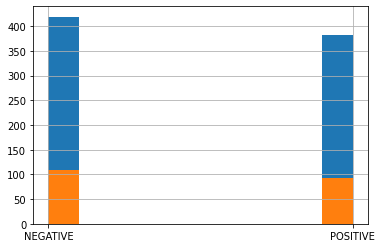

In [3]:
#Diagram Untuk melihat Perbandingan antara Class data data training dan testing  dan pembuatan data testing pada Test size sebesar 0.2 atau 20% dan otomatis data training 0.8 80%
x_train, x_test, y_train, y_test = model_selection.train_test_split(df['isi'],df['label'],test_size=0.2, random_state=10)
y_train.hist()
y_test.hist()

In [4]:
Encoder = LabelEncoder()
train_y = Encoder.fit_transform(y_train)
test_y = Encoder.transform(y_test)

In [5]:
#membuat CountVectorizer dengan menggunakan Unigram+bigram
cv = CountVectorizer(ngram_range=(2,3)) #1 = uni // 2 = bi // 3 = tri
cv.fit_transform(x_train)
len(cv.get_feature_names_out())

22857

In [6]:
print("Vocabulary: ", cv.vocabulary_)

Vocabulary:  {'tokopedia repot': 21173, 'repot seleksi': 17301, 'seleksi orang': 18305, 'orang buka': 14793, 'buka toko': 4752, 'toko beli': 20324, 'beli barang': 3933, 'barang kirim': 2351, 'kirim produk': 11004, 'produk kirim': 16521, 'kirim sesuai': 11051, 'sesuai prosedur': 18574, 'prosedur prosedur': 16850, 'prosedur susah': 16852, 'susah pesan': 19299, 'pesan sedia': 15974, 'sedia barang': 18236, 'barang member': 2426, 'member gold': 13201, 'gold silver': 7304, 'silver turun': 18750, 'turun hapus': 21895, 'hapus pasang': 7888, 'tokopedia repot seleksi': 21174, 'repot seleksi orang': 17302, 'seleksi orang buka': 18306, 'orang buka toko': 14794, 'buka toko beli': 4753, 'toko beli barang': 20325, 'beli barang kirim': 3948, 'barang kirim produk': 2361, 'kirim produk kirim': 11008, 'produk kirim sesuai': 16524, 'kirim sesuai prosedur': 11056, 'sesuai prosedur prosedur': 18576, 'prosedur prosedur susah': 16851, 'prosedur susah pesan': 16853, 'susah pesan sedia': 19300, 'pesan sedia bar

In [7]:
#memanggil Nama fitur
gf = cv.get_feature_names_out()
print(gf)

['abai abai' 'abai abai ikut' 'abai administrasi' ... 'zakat suka bangga'
 'zoning jaring' 'zoning jaring salah']


In [8]:
X_train = cv.fit_transform(x_train)
X_test = cv.transform(x_test)

In [9]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",train_y.shape)
print("y_test_shape : ",test_y.shape)

X_train_shape :  (800, 22857)
X_test_shape :  (200, 22857)
y_train_shape :  (800,)
y_test_shape :  (200,)


In [10]:
print("x_train : \n",X_train)
print("\n x_test : \n",X_test)
print("\n y_train : \n",train_y)
print("\n y_test : \n",test_y)

x_train : 
   (0, 21173)	1
  (0, 17301)	1
  (0, 18305)	1
  (0, 14793)	1
  (0, 4752)	1
  (0, 20324)	1
  (0, 3933)	1
  (0, 2351)	1
  (0, 11004)	1
  (0, 16521)	1
  (0, 11051)	1
  (0, 18574)	1
  (0, 16850)	1
  (0, 16852)	1
  (0, 19299)	1
  (0, 15974)	1
  (0, 18236)	1
  (0, 2426)	1
  (0, 13201)	1
  (0, 7304)	1
  (0, 18750)	1
  (0, 21895)	1
  (0, 7888)	1
  (0, 21174)	1
  (0, 17302)	1
  :	:
  (799, 14178)	1
  (799, 5483)	1
  (799, 4585)	1
  (799, 18987)	1
  (799, 10505)	1
  (799, 18766)	1
  (799, 13966)	1
  (799, 22381)	1
  (799, 4997)	1
  (799, 19481)	2
  (799, 13283)	2
  (799, 9175)	1
  (799, 10498)	1
  (799, 6680)	1
  (799, 13907)	1
  (799, 14179)	1
  (799, 5484)	1
  (799, 4586)	1
  (799, 18988)	1
  (799, 9179)	1
  (799, 10506)	1
  (799, 14444)	1
  (799, 18767)	1
  (799, 13967)	1
  (799, 22382)	1

 x_test : 
   (0, 19146)	1
  (1, 1017)	1
  (1, 2583)	1
  (1, 2585)	1
  (1, 10008)	1
  (1, 18323)	1
  (1, 19918)	1
  (1, 21175)	1
  (2, 131)	1
  (2, 1909)	1
  (2, 6332)	1
  (2, 6357)	1
  (2, 6358)

#Multinomial Naive Bayes

In [11]:
MNB = MultinomialNB()
MNB.fit(X_train, train_y)

MultinomialNB()

In [12]:
scores = cross_val_score(MNB, X_train, train_y, cv=10, scoring='accuracy')
print(scores)
print("K-Fold Mean -> ",cross_val_score(MNB, X_train, train_y, cv=10).mean())

[0.7375 0.675  0.6375 0.625  0.65   0.65   0.625  0.7    0.625  0.65  ]
K-Fold Mean ->  0.6575


In [13]:
MNB_pred = MNB.predict(X_test)

In [14]:
print(confusion_matrix(MNB_pred, test_y))
print("MNB Accuracy Score -> ",accuracy_score(test_y, MNB_pred)*100)
print("MNB Recall Score -> ",recall_score(test_y, MNB_pred)*100)
print("MNB Precision Score -> ",precision_score(test_y, MNB_pred)*100)
print("MNB f1 Score -> ",f1_score(test_y, MNB_pred)*100)

[[86 16]
 [22 76]]
MNB Accuracy Score ->  81.0
MNB Recall Score ->  82.6086956521739
MNB Precision Score ->  77.55102040816327
MNB f1 Score ->  80.0


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       108
           1       0.78      0.83      0.80        92

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200


Confusion Matrix:


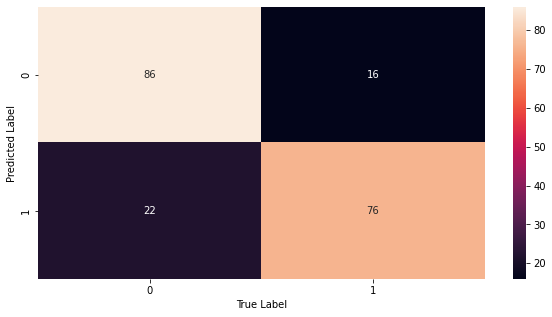



True Positive :  76
True Negative :  86
False Positive :  22
False Negative  :  16


In [15]:
print("Classification Report:")
print(classification_report(test_y, MNB_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(MNB_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, MNB_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [16]:
mae = mean_absolute_error(test_y, MNB_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.19


In [17]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_MNB = pd.DataFrame({'prediksi':MNB_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_MNB['prediksi'].value_counts()/df_result_MNB['prediksi'].count()*100)
df_persen_svm

,prediksi
0,51.00%
1,49.00%


#Bernoulli Naive Bayes

In [18]:
BNB = BernoulliNB()
BNB.fit(X_train, train_y)

BernoulliNB()

In [19]:
scores = cross_val_score(BNB, X_train, train_y, cv=10, scoring='accuracy')
print(scores)
print("K-Fold Mean -> ",cross_val_score(BNB, X_train, train_y, cv=10).mean())

[0.6625 0.6875 0.6    0.6125 0.5625 0.5875 0.6    0.6375 0.5875 0.6125]
K-Fold Mean ->  0.615


In [20]:
BNB_pred = BNB.predict(X_test)

In [21]:
print(confusion_matrix(BNB_pred, test_y))
print("BNB Accuracy Score -> ",accuracy_score(test_y, BNB_pred)*100)
print("BNB Recall Score -> ",recall_score(test_y, BNB_pred)*100)
print("BNB Precision Score -> ",precision_score(test_y, BNB_pred)*100)
print("BNB f1 Score -> ",f1_score(test_y, BNB_pred)*100)

[[56  6]
 [52 86]]
BNB Accuracy Score ->  71.0
BNB Recall Score ->  93.47826086956522
BNB Precision Score ->  62.31884057971014
BNB f1 Score ->  74.78260869565217


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.52      0.66       108
           1       0.62      0.93      0.75        92

    accuracy                           0.71       200
   macro avg       0.76      0.73      0.70       200
weighted avg       0.77      0.71      0.70       200


Confusion Matrix:


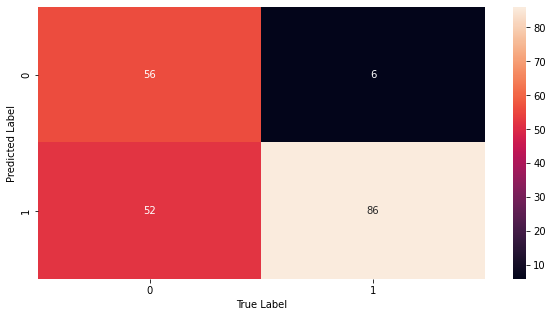



True Positive :  86
True Negative :  56
False Positive :  52
False Negative  :  6


In [22]:
print("Classification Report:")
print(classification_report(test_y, BNB_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(BNB_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, BNB_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [23]:
mae = mean_absolute_error(test_y, BNB_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.29


In [24]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_BNB = pd.DataFrame({'prediksi':BNB_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_BNB['prediksi'].value_counts()/df_result_BNB['prediksi'].count()*100)
df_persen_svm

,prediksi
1,69.00%
0,31.00%


#Hitung nilai C

In [25]:
for c in [0.01, 0.05, 0.25, 0.5, 1, 1.01, 1.05, 1.25, 1.5, 2, 2.01, 2.05, 2.25, 2.5, 3]: # Menghitung nilai C
	sv = SVC(C=c)
	sv.fit(X_train, train_y)
	print('Accuracy fot C=%s: %s'
	%(c,accuracy_score(test_y, sv.predict(X_test)))) 

Accuracy fot C=0.01: 0.54
Accuracy fot C=0.05: 0.665
Accuracy fot C=0.25: 0.475
Accuracy fot C=0.5: 0.475
Accuracy fot C=1: 0.515
Accuracy fot C=1.01: 0.515
Accuracy fot C=1.05: 0.515
Accuracy fot C=1.25: 0.535
Accuracy fot C=1.5: 0.545
Accuracy fot C=2: 0.57
Accuracy fot C=2.01: 0.57
Accuracy fot C=2.05: 0.57
Accuracy fot C=2.25: 0.57
Accuracy fot C=2.5: 0.575
Accuracy fot C=3: 0.575


# Linear

In [26]:
linear = SVC(kernel='linear', C=3)
linear.fit(X_train, train_y)

SVC(C=3, kernel='linear')

In [27]:
scores = cross_val_score(linear, X_train, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(linear,X_train, train_y, cv=10).mean())

[0.8625 0.85   0.7125 0.75   0.75   0.8    0.7375 0.825  0.7    0.775 ]
K-Fold Mean ->  0.77625


In [28]:
linear_pred = linear.predict(X_test)

In [29]:
print(confusion_matrix(linear_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, linear_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, linear_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, linear_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, linear_pred)*100)

[[67  5]
 [41 87]]
SVM Accuracy Score ->  77.0
SVM Recall Score ->  94.56521739130434
SVM Precision Score ->  67.96875
SVM f1 Score ->  79.0909090909091


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.62      0.74       108
           1       0.68      0.95      0.79        92

    accuracy                           0.77       200
   macro avg       0.81      0.78      0.77       200
weighted avg       0.82      0.77      0.77       200


Confusion Matrix:


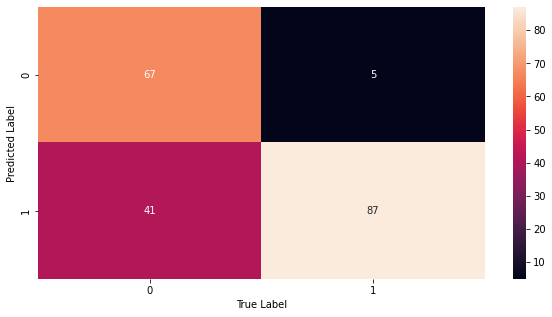



True Positive :  87
True Negative :  67
False Positive :  41
False Negative  :  5


In [30]:
print("Classification Report:")
print(classification_report(test_y, linear_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(linear_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, linear_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [31]:
mae = mean_absolute_error(test_y, linear_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.23


In [32]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_linear = pd.DataFrame({'prediksi':linear_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_linear['prediksi'].value_counts()/df_result_linear['prediksi'].count()*100)
df_persen_svm

,prediksi
1,64.00%
0,36.00%


# Polynomial 

In [33]:
poly = SVC(kernel='poly', C=3)
poly.fit(X_train, train_y)

SVC(C=3, kernel='poly')

In [34]:
scores = cross_val_score(poly, X_train, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(poly,X_train, train_y, cv=10).mean())

[0.475  0.475  0.475  0.475  0.475  0.475  0.475  0.475  0.475  0.4875]
K-Fold Mean ->  0.47624999999999995


In [35]:
poly_pred = poly.predict(X_test)

In [36]:
print(confusion_matrix(poly_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, poly_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, poly_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, poly_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, poly_pred)*100)

[[  0   0]
 [108  92]]
SVM Accuracy Score ->  46.0
SVM Recall Score ->  100.0
SVM Precision Score ->  46.0
SVM f1 Score ->  63.01369863013699


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.46      1.00      0.63        92

    accuracy                           0.46       200
   macro avg       0.23      0.50      0.32       200
weighted avg       0.21      0.46      0.29       200


Confusion Matrix:


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


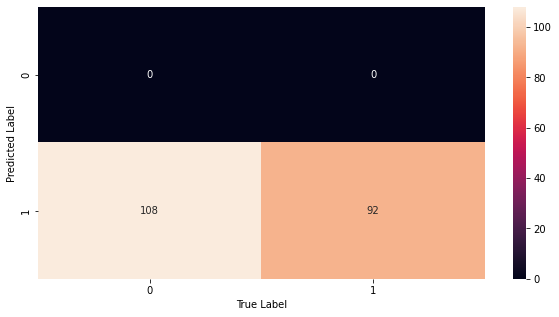



True Positive :  92
True Negative :  0
False Positive :  108
False Negative  :  0


In [37]:
print("Classification Report:")
print(classification_report(test_y, poly_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(poly_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, poly_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [38]:
mae = mean_absolute_error(test_y, poly_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.54


In [39]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_poly = pd.DataFrame({'prediksi':poly_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_poly['prediksi'].value_counts()/df_result_poly['prediksi'].count()*100)
df_persen_svm

,prediksi
1,100.00%


# Radial Basis Function

In [40]:
rbf = SVC(kernel='rbf', C=3, gamma=0.50 )
rbf.fit(X_train, train_y)

SVC(C=3, gamma=0.5)

In [41]:
scores = cross_val_score(rbf, X_train, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(rbf,X_train, train_y, cv=10).mean())

[0.5375 0.525  0.5125 0.5375 0.525  0.55   0.55   0.525  0.5375 0.5125]
K-Fold Mean ->  0.53125


In [42]:
rbf_pred = rbf.predict(X_test)

In [43]:
print(confusion_matrix(rbf_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, rbf_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, rbf_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, rbf_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, rbf_pred)*100)

[[74 48]
 [34 44]]
SVM Accuracy Score ->  59.0
SVM Recall Score ->  47.82608695652174
SVM Precision Score ->  56.41025641025641
SVM f1 Score ->  51.764705882352935


Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.69      0.64       108
           1       0.56      0.48      0.52        92

    accuracy                           0.59       200
   macro avg       0.59      0.58      0.58       200
weighted avg       0.59      0.59      0.59       200


Confusion Matrix:


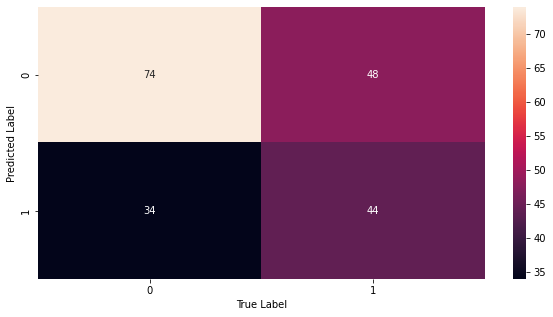



True Positive :  44
True Negative :  74
False Positive :  34
False Negative  :  48


In [44]:
print("Classification Report:")
print(classification_report(test_y, rbf_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(rbf_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, rbf_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)



In [45]:
mae = mean_absolute_error(test_y, rbf_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.41


In [46]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_rbf = pd.DataFrame({'prediksi':rbf_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_rbf['prediksi'].value_counts()/df_result_rbf['prediksi'].count()*100)
df_persen_svm

,prediksi
0,61.00%
1,39.00%


# Sigmoid

In [47]:
sig = SVC(kernel='sigmoid', C=3)
sig.fit(X_train, train_y)

SVC(C=3, kernel='sigmoid')

In [48]:
scores = cross_val_score(sig, X_train, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(sig,X_train, train_y, cv=10).mean())

[0.875  0.85   0.7625 0.75   0.775  0.8    0.8    0.85   0.75   0.8125]
K-Fold Mean ->  0.8025


In [49]:
sig_pred = sig.predict(X_test)

In [50]:
print(confusion_matrix(sig_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, sig_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, sig_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, sig_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, sig_pred)*100)

[[80 11]
 [28 81]]
SVM Accuracy Score ->  80.5
SVM Recall Score ->  88.04347826086956
SVM Precision Score ->  74.31192660550458
SVM f1 Score ->  80.59701492537313


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.74      0.80       108
           1       0.74      0.88      0.81        92

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.82      0.81      0.80       200


Confusion Matrix:


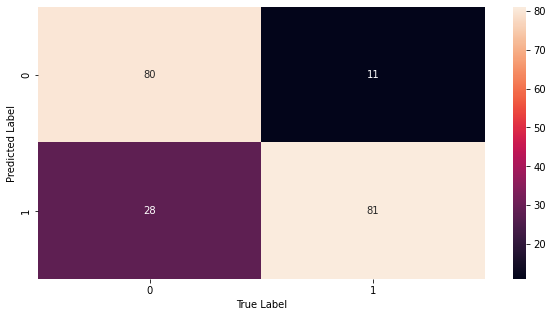



True Positive :  81
True Negative :  80
False Positive :  28
False Negative  :  11


In [51]:
print("Classification Report:")
print(classification_report(test_y, sig_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(sig_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, sig_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [52]:
mae = mean_absolute_error(test_y, sig_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.195


In [53]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_sig = pd.DataFrame({'prediksi':sig_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_sig['prediksi'].value_counts()/df_result_sig['prediksi'].count()*100)
df_persen_svm

,prediksi
1,54.50%
0,45.50%
